# lab 1

In [9]:
import os
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import cv2


In [10]:
def bw_0(filename):
    img = mpimg.imread(filename)
    arr = img.mean(axis=-1)
    plt.imshow(arr, cmap=plt.get_cmap('gray'))
    plt.show()
    return img

In [11]:
def bw(filename):

    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    
    thresholdValue = np.mean(image)
    xDim, yDim = image.shape

    for i in range(xDim):
        for j in range(yDim):
            if image[i][j] > thresholdValue:
                image[i][j] = 255  
            else:
                image[i][j] = 0    

    # cv2.imshow('Image', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
   
    plt.imshow(image, cmap='gray')
    plt.show()
    return image



In [12]:
# def otsu(image):
    
#     height, width = image.shape
#     hist = np.zeros(256)

#     for i in range(height):
#         for j in range(width):
#             pixel_value = image[i, j]
#             hist[pixel_value] += 1

#     total_pixels = height * width
#     p = hist / total_pixels

#     max_variance = 0
#     optimal_threshold = 0

#     for a in range(256):

#         q1 = sum(p[:a])
#         q2 = sum(p[a:])

#         if q1 == 0 or q2 == 0:
#             continue

#         mean1 = sum([x * p[x] for x in range(a)]) / q1
#         mean2 = sum([x * p[x] for x in range(a, 256)]) / q2

#         var1 = sum([((x - mean1) ** 2) * p[x] for x in range(a)]) / q1
#         var2 = sum([((x - mean2) ** 2) * p[x] for x in range(a, 256)]) / q2

#         result = q1 * var1 + q2 * var2

#         if result > max_variance:
#             max_variance = result
#             optimal_threshold = a
            
#     return optimal_threshold

def otsu(image):
    height, width = image.shape
    hist = np.zeros(256)

    # Подсчёт гистограммы
    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            hist[pixel_value] += 1

    total_pixels = height * width
    p = hist / total_pixels

    max_variance = 0
    optimal_threshold = 0

    # Поиск оптимального порога методом Оцу
    for a in range(256):
        q1 = sum(p[:a])
        q2 = sum(p[a:])

        if q1 == 0 or q2 == 0:
            continue

        mean1 = sum([x * p[x] for x in range(a)]) / q1
        mean2 = sum([x * p[x] for x in range(a, 256)]) / q2

        var1 = sum([((x - mean1) ** 2) * p[x] for x in range(a)]) / q1
        var2 = sum([((x - mean2) ** 2) * p[x] for x in range(a, 256)]) / q2

        result = q1 * var1 + q2 * var2

        if result > max_variance:
            max_variance = result
            optimal_threshold = a
            
    return optimal_threshold





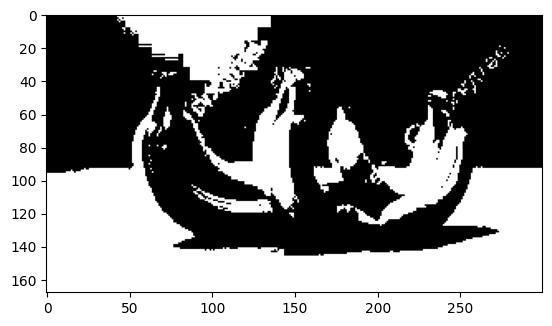

Оптимальный порог для IMG000.png: 0
Изображение с прозрачным фоном сохранено как 'IMG000_transparent.png'


In [13]:
def check_image(filename):
    img = cv2.imread(filename)
    if img is None:
        print(f"Файл не является изображением или повреждён: {filename}")
        return False
    return True

def objectImage(image2, filename):
    original_image = cv2.imread(filename)
    
    if original_image is None:
        print(f"Ошибка при загрузке файла: {filename}")
        return

    if len(original_image.shape) == 2:
        original_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)
    
    optimal_threshold = otsu(image2)
    print(f"Оптимальный порог для {filename}: {optimal_threshold}")

    mask = np.zeros_like(image2)
    for i in range(image2.shape[0]):
        for j in range(image2.shape[1]):
            if image2[i, j] >= optimal_threshold:
                mask[i, j] = 255
            else:
                mask[i, j] = 0

    cv2.imshow("Mask before inversion", mask)

    inverted_mask = cv2.bitwise_not(mask)
    image_with_alpha = cv2.cvtColor(original_image, cv2.COLOR_BGR2BGRA)
    image_with_alpha[:, :, 3] = inverted_mask

    # Генерация нового имени файла
    base_name, _ = os.path.splitext(filename)
    output_filename = f"{base_name}_transparent.png"
    
    cv2.imwrite(output_filename, image_with_alpha)
    print(f"Изображение с прозрачным фоном сохранено как '{output_filename}'")

    cv2.imshow('Segmented Object', image_with_alpha)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Основной код
filenames = ["IMG000.png", "foto01.png", "lab1_foto2.png"]  # Список ваших файлов

for filename in filenames:
    if check_image(filename):
        bw_image = bw(filename)
        if bw_image is not None:
            objectImage(bw_image, filename)

In [ ]:
# def objectImage(image2, filename):
#     # Оригинальное изображение
#     original_image = cv2.imread(filename)
    
#     # Получаем порог через функцию otsu
#     optimal_threshold = otsu(image2)
    
#     # Создаём маску на основе этого порога
#     mask = np.zeros_like(image2)
#     for i in range(image2.shape[0]):
#         for j in range(image2.shape[1]):
#             if image2[i, j] >= optimal_threshold:
#                 mask[i, j] = 255
#             else:
#                 mask[i, j] = 0

#     # Инвертируем маску, чтобы фон стал прозрачным
#     inverted_mask = cv2.bitwise_not(mask)

#     # Преобразование оригинального изображения в формат с альфа-каналом
#     image_with_alpha = cv2.cvtColor(original_image, cv2.COLOR_BGR2BGRA)

#     # Применение инвертированной маски для создания прозрачного фона
#     image_with_alpha[:, :, 3] = inverted_mask

#     # Сохранение результата с прозрачным фоном
#     cv2.imwrite('object_with_transparent_background.png', image_with_alpha)
#     print("Изображение с прозрачным фоном сохранено как 'object_with_transparent_background.png'")

#     cv2.imshow("Mask before inversion", mask)


#     # Показать маску и сегментированный объект
#     cv2.imshow('Mask', mask)
#     cv2.imshow('Segmented Object', image_with_alpha)

#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# # Основной код
# filename = "foto0.png"

# # Применение чёрно-белого преобразования
# bw_image = bw(filename)

# # Вызов функции для вырезания объекта и создания изображения с прозрачным фоном
# objectImage(bw_image, filename)

In [ ]:
# def objectImage(image2, filename):

#     original_image = cv2.imread(filename)
#     optimal_threshold = otsu(image2) 
    

#     mask = np.zeros_like(image2)

#     for i in range(image2.shape[0]):
#         for j in range(image2.shape[1]):
#             if image2[i, j] >= optimal_threshold:
#                 mask[i, j] = 255
#             else:
#                 mask[i, j] = 0


#     image_with_alpha = cv2.cvtColor(original_image, cv2.COLOR_BGR2BGRA)

#     inverted_mask = cv2.bitwise_not(mask)
#     image_with_alpha[:, :, 3] = inverted_mask

    
#     cv2.imwrite('object_with_transparent_background.png', image_with_alpha)
#     print("Изображение с вырезанным объектом и прозрачным фоном сохранено как 'object_with_transparent_background.png'")


#     cv2.imshow('Mask', mask)
#     cv2.imshow('Segmented Object', image_with_alpha)

#     cv2.waitKey(0)
#     cv2.destroyAllWindows()


# filename = "foto01.png"

# bw_image = bw(filename)
# objectImage(bw_image, filename)